In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
%store -r final_clean_df

In [3]:
final_clean_df.head(5)

,object,id,oracle_id,multiverse_ids,name,lang,released_at,uri,scryfall_uri,layout,...,rulings,subtypes,supertypes,text,type,types,uuid,edhrecRank,leadershipSkills,prices
0,card,dbcdbf7a-9294-47ad-9f93-c16b78c7463a,cd6250ae-9079-4a62-8a70-0d94fbac21bc,[],Earthshaker Giant,en,2019-11-15,https://api.scryfall.com/cards/dbcdbf7a-9294-4...,https://scryfall.com/card/gn2/5/earthshaker-gi...,normal,...,[],"[Giant, Druid]",[],Trample\nWhen Earthshaker Giant enters the bat...,Creature — Giant Druid,[Creature],d77da7e3-b017-559f-8081-eb56d48da8a2,not ranked,unusable,"{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap..."
1,card,acb3ce9b-ee4f-410a-8db3-e87aeb0a4444,ab0dfae5-b9d4-417b-8a0d-2525ae3a73b9,[],Fiendish Duo,en,2019-11-15,https://api.scryfall.com/cards/acb3ce9b-ee4f-4...,https://scryfall.com/card/gn2/4/fiendish-duo?u...,normal,...,[],[Devil],[],First strike\nIf a source would deal damage to...,Creature — Devil,[Creature],dcb1e7e2-bd48-5d9b-a872-7386e81bbac4,not ranked,unusable,"{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap..."
2,card,17b2ed72-d0f0-4d8d-bb5e-dce08d157466,7264d3b3-fd46-4ea3-a85d-f0b068c331ad,[],Calculating Lich,en,2019-11-15,https://api.scryfall.com/cards/17b2ed72-d0f0-4...,https://scryfall.com/card/gn2/3/calculating-li...,normal,...,[],"[Zombie, Wizard]",[],Menace\nWhenever a creature attacks one of you...,Creature — Zombie Wizard,[Creature],aedff6d1-7901-5619-9ff6-b3dd9c43b896,not ranked,unusable,"{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap..."
3,card,0faa9eea-fbf1-41f7-9def-1ec3d5134a53,e6284fb3-7cf8-4730-b156-10085b70b0e8,[],Sphinx of Enlightenment,en,2019-11-15,https://api.scryfall.com/cards/0faa9eea-fbf1-4...,https://scryfall.com/card/gn2/2/sphinx-of-enli...,normal,...,[],[Sphinx],[],Flying\nWhen Sphinx of Enlightenment enters th...,Creature — Sphinx,[Creature],5c885aa6-c991-5eec-b140-d43a70428566,not ranked,unusable,"{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap..."
4,card,ecbeac44-9392-4522-8ff5-87079386bd0a,43296f8b-58d9-446e-a538-1c4921552c41,[],Highcliff Felidar,en,2019-11-15,https://api.scryfall.com/cards/ecbeac44-9392-4...,https://scryfall.com/card/gn2/1/highcliff-feli...,normal,...,[],"[Cat, Beast]",[],Vigilance\nWhen Highcliff Felidar enters the b...,Creature — Cat Beast,[Creature],a9bf68a1-7eb7-5387-a651-5c0ede8d86ec,not ranked,unusable,"{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap..."


In [4]:
final_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24299 entries, 0 to 24298
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   object             24299 non-null  object        
 1   id                 24299 non-null  object        
 2   oracle_id          24299 non-null  object        
 3   multiverse_ids     24299 non-null  object        
 4   name               24299 non-null  object        
 5   lang               24299 non-null  object        
 6   released_at        24299 non-null  datetime64[ns]
 7   uri                24299 non-null  object        
 8   scryfall_uri       24299 non-null  object        
 9   layout             24299 non-null  object        
 10  highres_image      24299 non-null  bool          
 11  image_uris         24299 non-null  object        
 12  mana_cost          24299 non-null  object        
 13  cmc                24299 non-null  float64       
 14  power 

# Helpfull function

In [5]:
# function to add value labels
#aggiornato la funzione, y è una serie quindi ho messo iloc!!
def addlabels(x,y,limite):
    for i in range(len(x)):
        try:
            if(y[i]<limite):
                plt.text(i, y[i], y[i], ha = 'center')
            else:
                plt.text(i, limite, y[i], ha = 'center')
        except:
            print('Error')

In [85]:
def addlabels_oriz(y,x,limite):
    #print(len(y))
    for i in range(len(y)):
        try:
            if(x[i]<limite):
                plt.text(x[i], i, x[i], ha = 'center')
                #print(x[i])
            else:
                plt.text(limite, i, x[i], ha = 'center')
        except:
            print('Error')

In [7]:
#lista con tipi importanti
def create_lista_all_type(): #ok perfetto
    lista_main_type = []
    for index,tipo in final_clean_df.types.items():
        for x in tipo:
            if x not in lista_main_type:
                lista_main_type.append(x)
    return lista_main_type

In [8]:
def search_row_by_type(search_type): #ok perfetto, ritorno gli indici che hanno il typo idicato
    lista_indici = []
    count = 0
    for index,tipo in final_clean_df.types.items():
        if search_type in tipo:
            count += 1
            lista_indici.append(index)
    return lista_indici

# how many cards are printed in a period

In [9]:
many_cards_relesed = final_clean_df.released_at.value_counts(sort=False)
many_cards_relesed.sort_index(inplace=True)
#sorted(many_cards_relesed.index)
many_cards_relesed[:30]
many_cards_relesed

released_at
1993-08-05    287
1993-10-04      2
1993-11-01      1
1993-12-10      4
1993-12-17     77
             ... 
2019-08-23     74
2019-10-04    274
2019-10-22      2
2019-11-03      2
2019-11-15      5
Name: count, Length: 400, dtype: int64

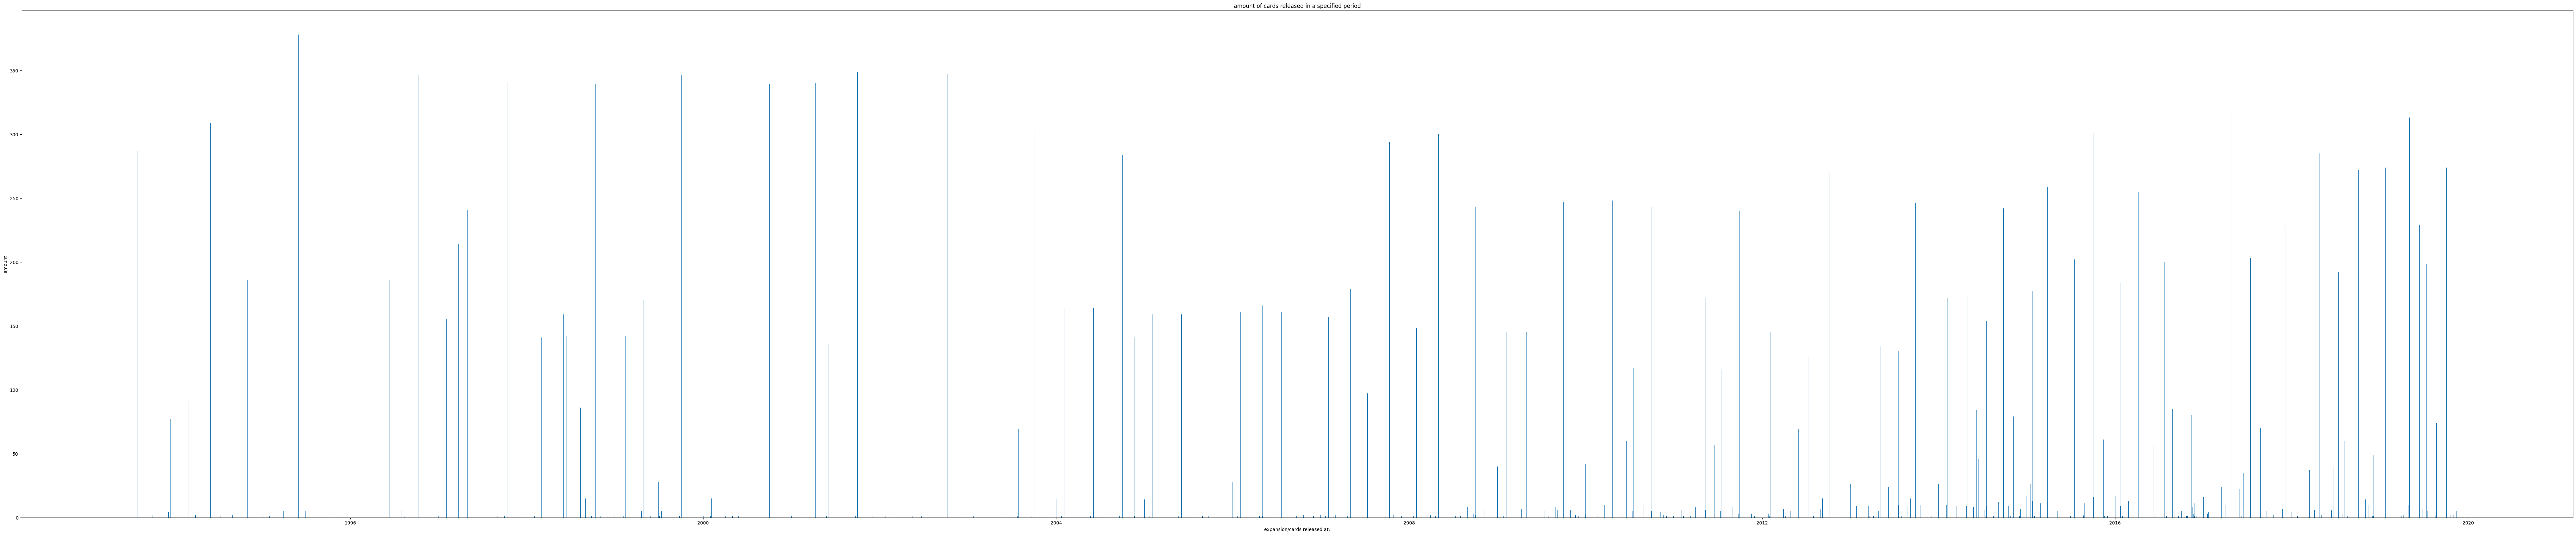

In [10]:
plt.figure(figsize=(100,20))
plt.bar(many_cards_relesed.index, many_cards_relesed.values, width=2)
plt.xlabel('expansion/cards released at:')
plt.ylabel('amount')
plt.title('amount of cards released in a specified period')
#addlabels(many_cards_relesed.index,many_cards_relesed.values,200000)
plt.show()

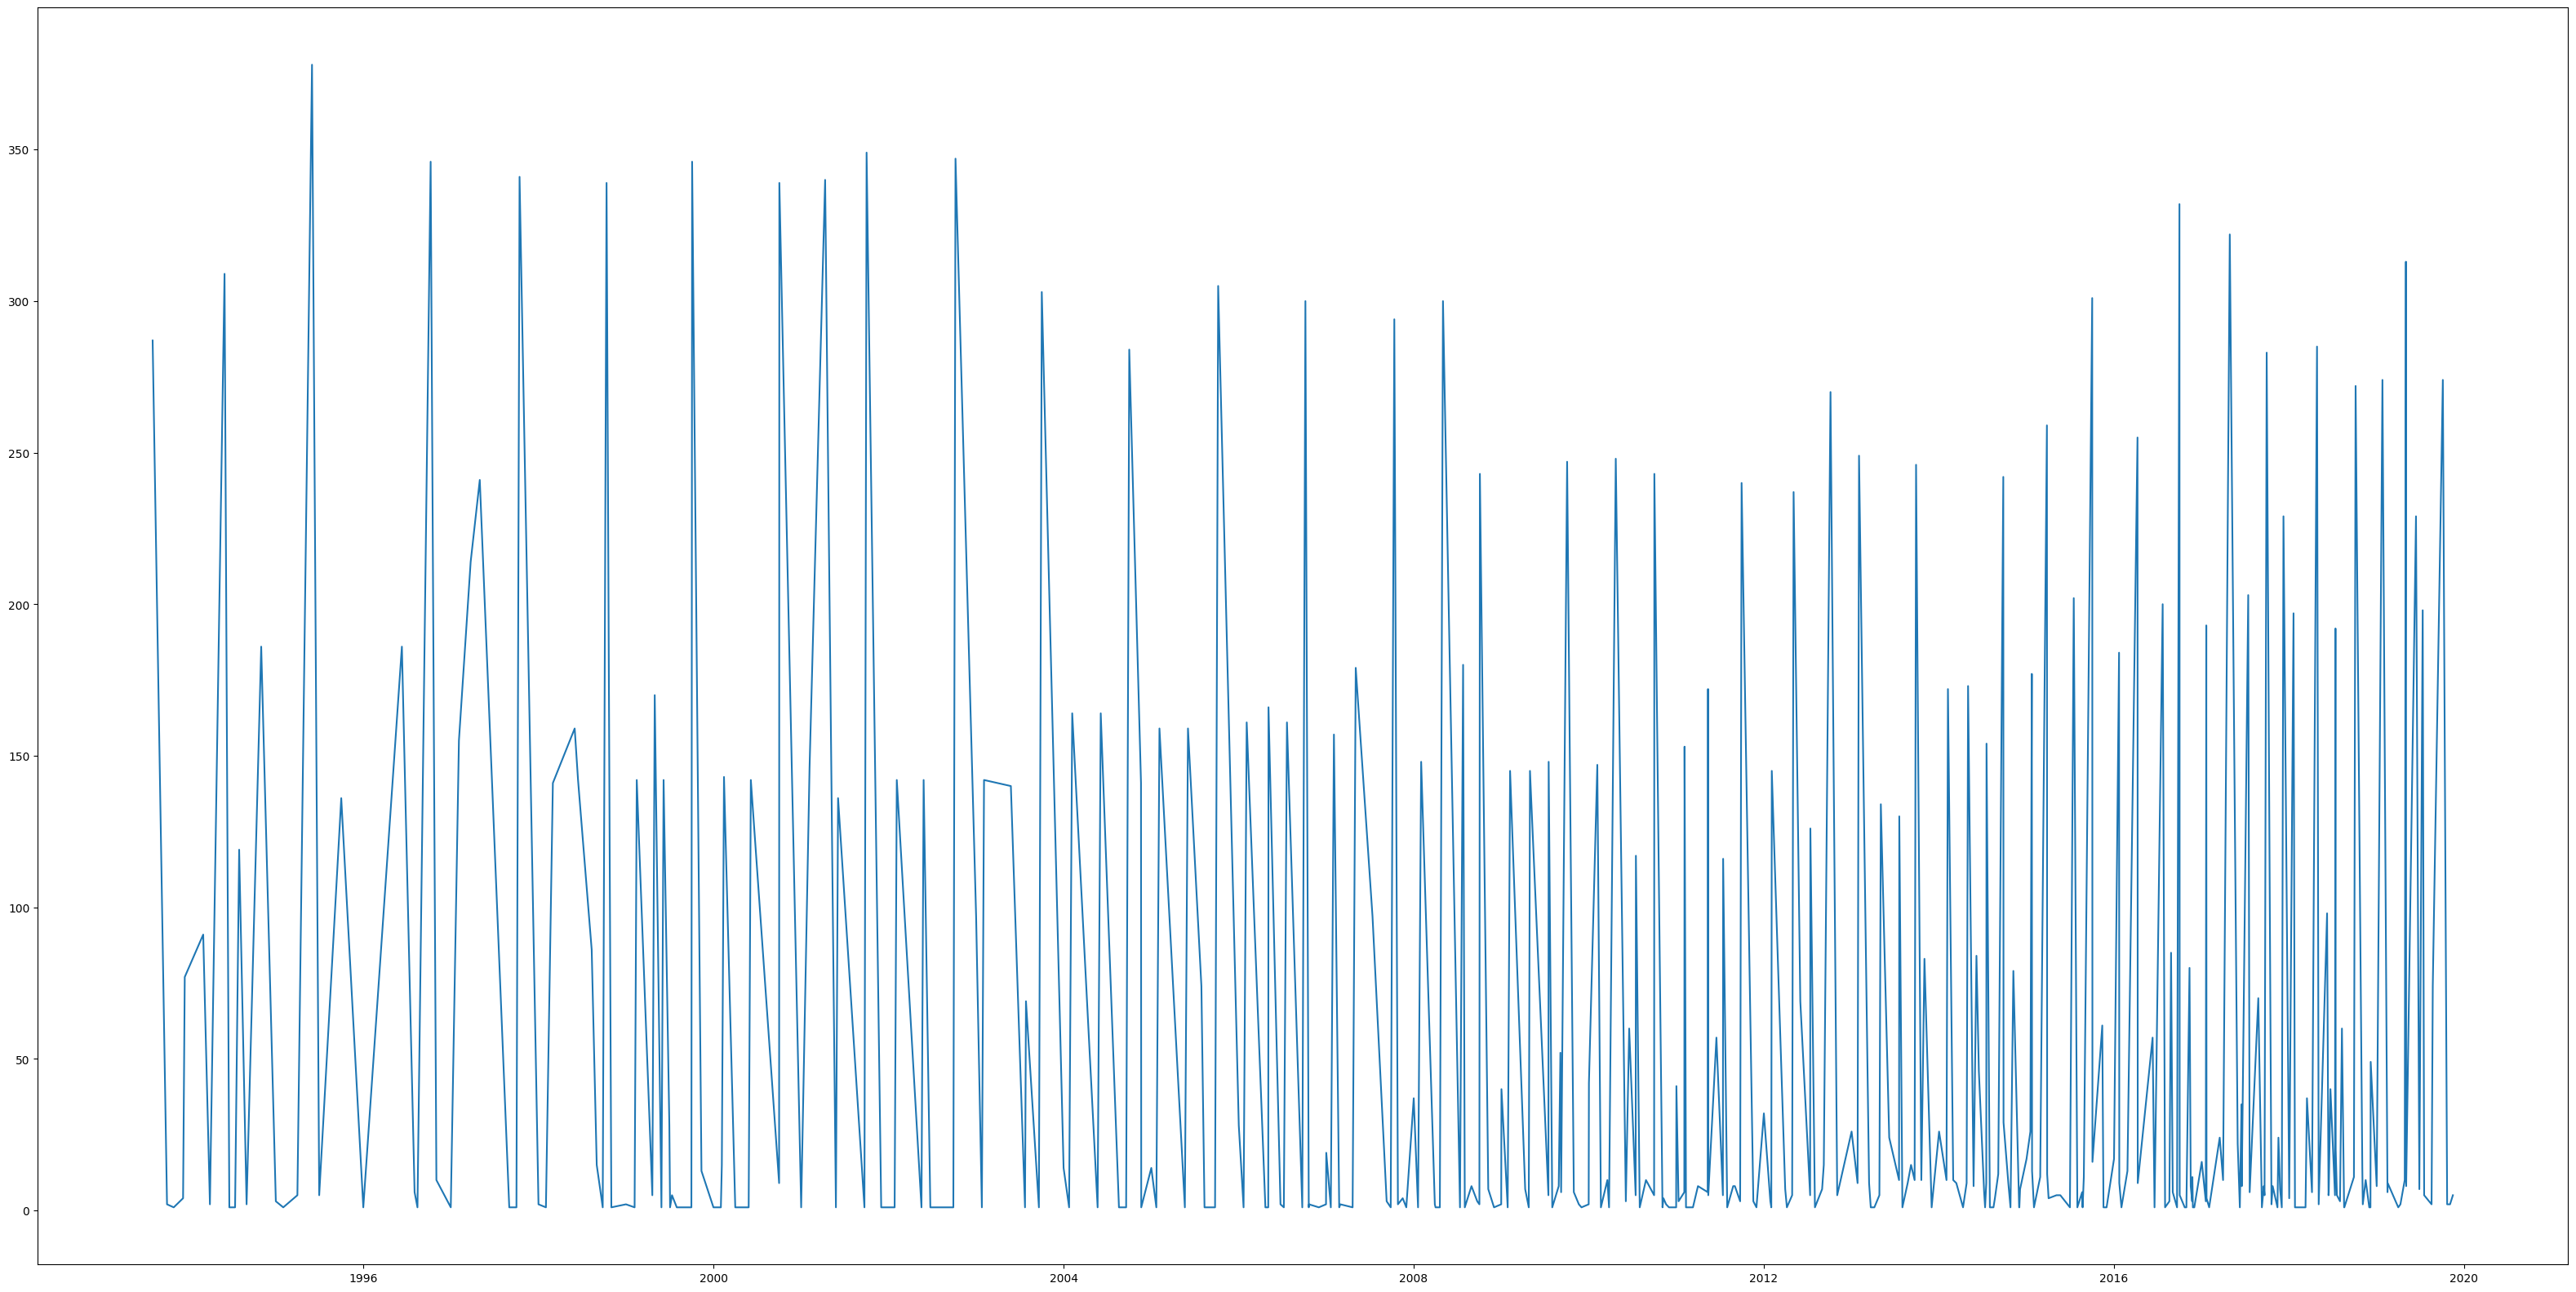

In [11]:
plt.figure(figsize=(40,20))
plt.plot(many_cards_relesed)
plt.show()

In [12]:
# layout. how many types

C:\Users\elped\AppData\Local\Temp\ipykernel_1736\1830353509.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(x[i]<limite):
C:\Users\elped\AppData\Local\Temp\ipykernel_1736\1830353509.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(limite, i, x[i], ha = 'center')
C:\Users\elped\AppData\Local\Temp\ipykernel_1736\1830353509.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i], i, x[i], ha = 'center')


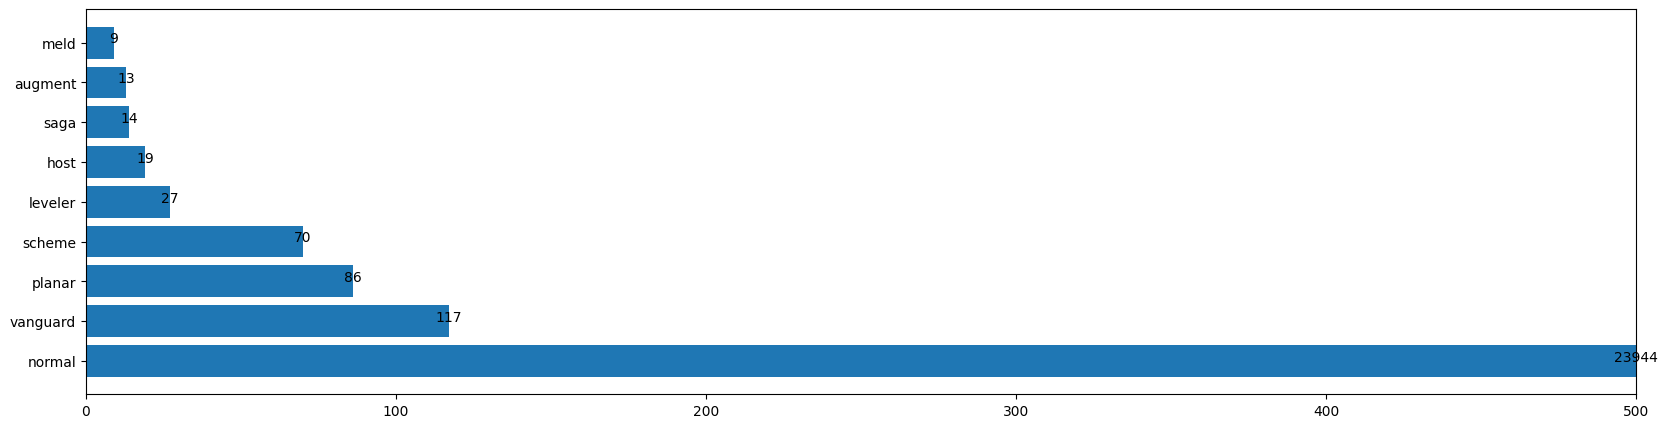

In [13]:
plt.figure(figsize=(20,5))
plt.barh(final_clean_df.layout.value_counts().index,final_clean_df.layout.value_counts())
addlabels_oriz(final_clean_df.layout.value_counts().index,final_clean_df.layout.value_counts(),500)
plt.xlim(0,500)
plt.show()

In [14]:
final_clean_df.columns

Index(['object', 'id', 'oracle_id', 'multiverse_ids', 'name', 'lang',
       'released_at', 'uri', 'scryfall_uri', 'layout', 'highres_image',
       'image_uris', 'mana_cost', 'cmc', 'power', 'toughness', 'colors',
       'color_identity', 'legalities', 'games', 'reserved', 'foil', 'nonfoil',
       'oversized', 'promo', 'reprint', 'variation', 'set', 'set_name',
       'set_type', 'set_uri', 'set_search_uri', 'scryfall_set_uri',
       'rulings_uri', 'prints_search_uri', 'collector_number', 'digital',
       'rarity', 'flavor_text', 'card_back_id', 'artist', 'artist_ids',
       'illustration_id', 'border_color', 'frame', 'full_art', 'textless',
       'booster', 'story_spotlight', 'related_uris', 'edhrec_rank',
       'all_parts', 'loyalty', 'foreignData', 'printings', 'rulings',
       'subtypes', 'supertypes', 'text', 'type', 'types', 'uuid', 'edhrecRank',
       'leadershipSkills', 'prices'],
      dtype='object')

In [15]:
final_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24299 entries, 0 to 24298
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   object             24299 non-null  object        
 1   id                 24299 non-null  object        
 2   oracle_id          24299 non-null  object        
 3   multiverse_ids     24299 non-null  object        
 4   name               24299 non-null  object        
 5   lang               24299 non-null  object        
 6   released_at        24299 non-null  datetime64[ns]
 7   uri                24299 non-null  object        
 8   scryfall_uri       24299 non-null  object        
 9   layout             24299 non-null  object        
 10  highres_image      24299 non-null  bool          
 11  image_uris         24299 non-null  object        
 12  mana_cost          24299 non-null  object        
 13  cmc                24299 non-null  float64       
 14  power 

# cmc: costo di mana convertito, cioè  converted mana value -> qunati carte in base al costo

Error
Error


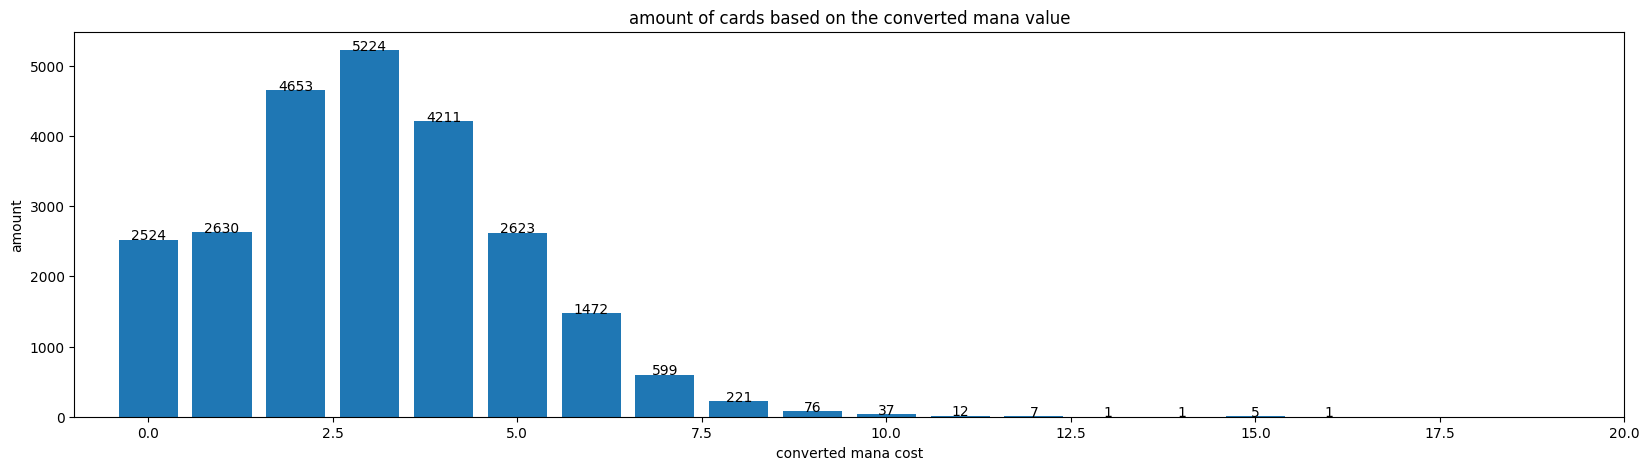

In [16]:
#aggiungere numeri a lato
plt.figure(figsize=(20,5))
plt.bar(final_clean_df.cmc.value_counts().index,final_clean_df.cmc.value_counts())
addlabels(final_clean_df.cmc.value_counts().index,final_clean_df.cmc.value_counts(),6000)
#plt.ylim(0,500)
#plt.legend()
plt.xlim(-1,20)
plt.title('amount of cards based on the converted mana value')
plt.ylabel('amount')
plt.xlabel('converted mana cost')
plt.show()

converted mana cost for type creture, sorcery, instant, enchantment, artifact

devo utilizzare type_line

In [17]:
final_clean_df.types.value_counts() #tutte le creture 11692

types
[Creature]                 10867
[Instant]                   2935
[Enchantment]               2670
[Sorcery]                   2652
[Land]                      1986
[Artifact]                  1651
[Artifact, Creature]         732
[Planeswalker]               316
[Vanguard]                   117
[Enchantment, Creature]       91
[Plane]                       78
[Scheme]                      70
[Conspiracy]                  25
[Tribal, Instant]             22
[Tribal, Sorcery]             18
[Hero]                        16
[Tribal, Enchantment]         15
[Phenomenon]                   8
[Enchantment, Artifact]        7
[Artifact, Land]               6
[Hero, Artifact]               5
[Tribal, Artifact]             5
[Summon]                       3
[Land, Creature]               2
[instant]                      1
[Eaturecray]                   1
Name: count, dtype: int64

Error


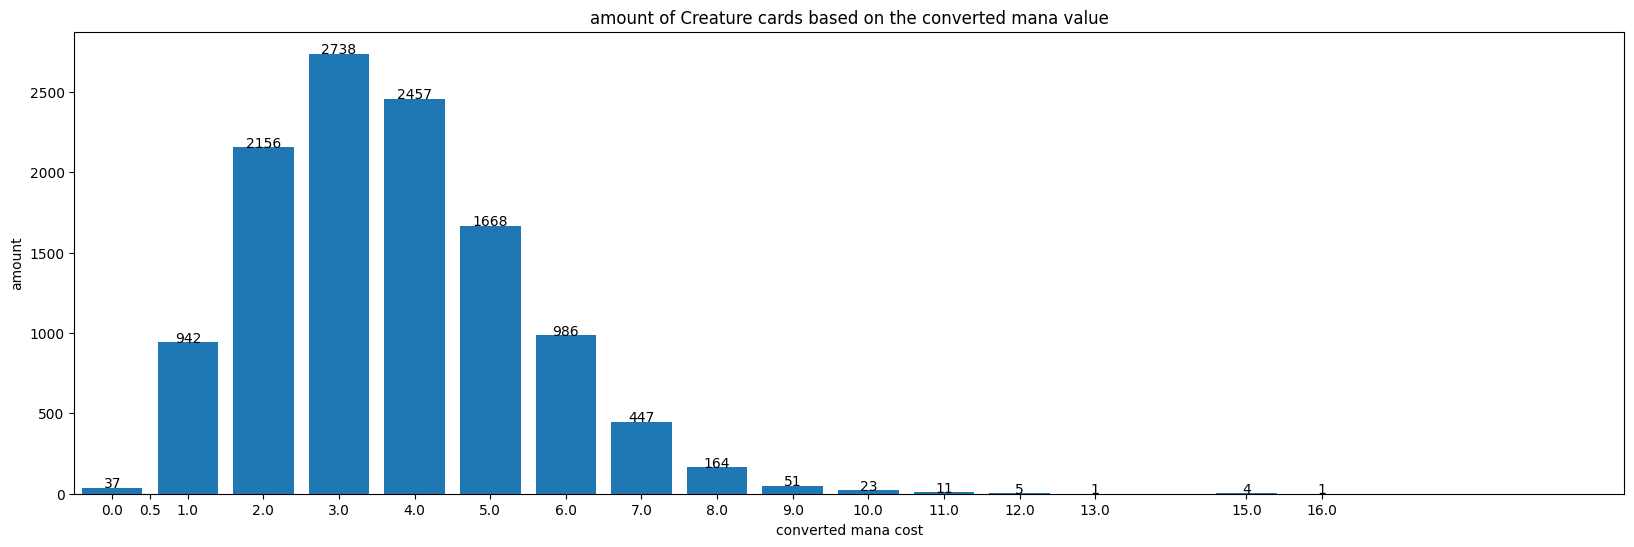

Error
Error


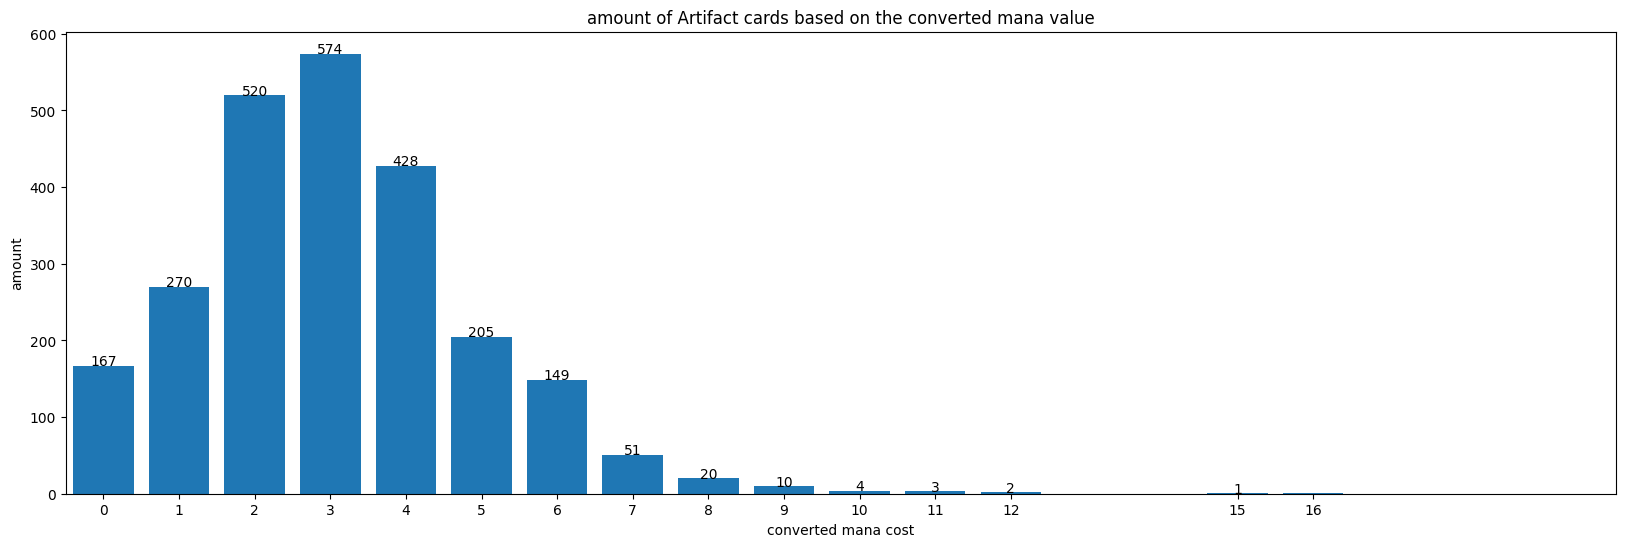

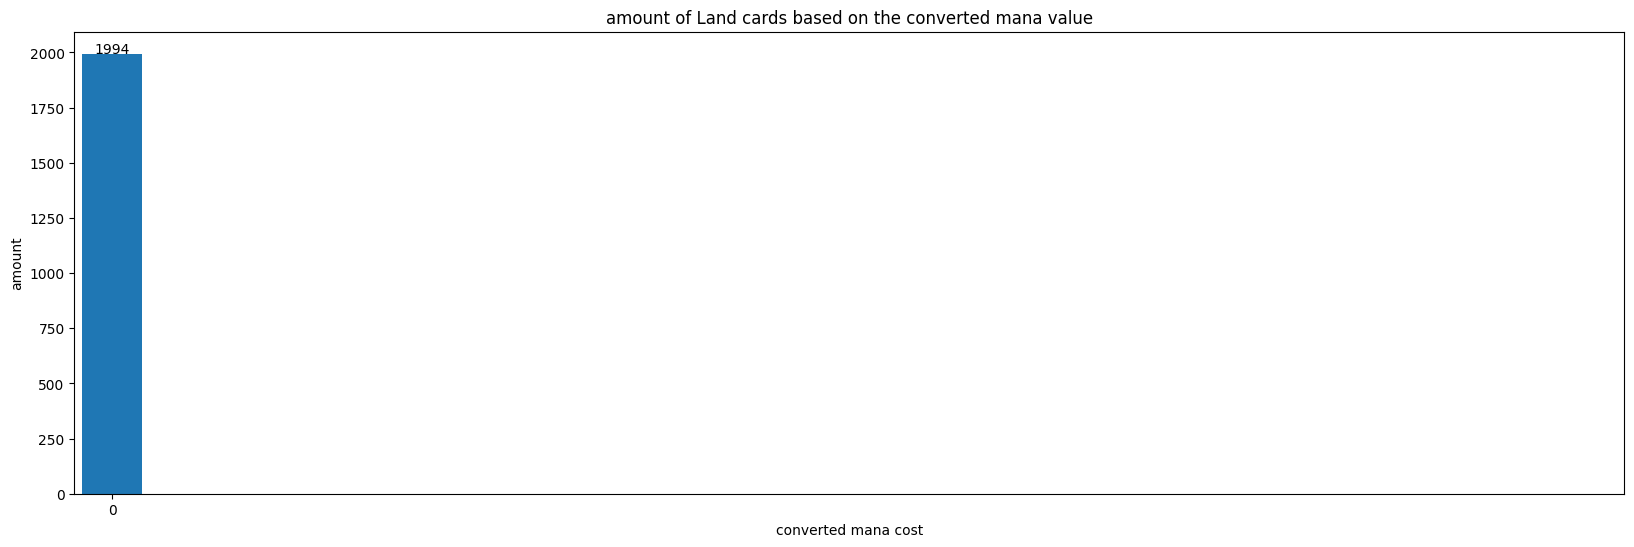

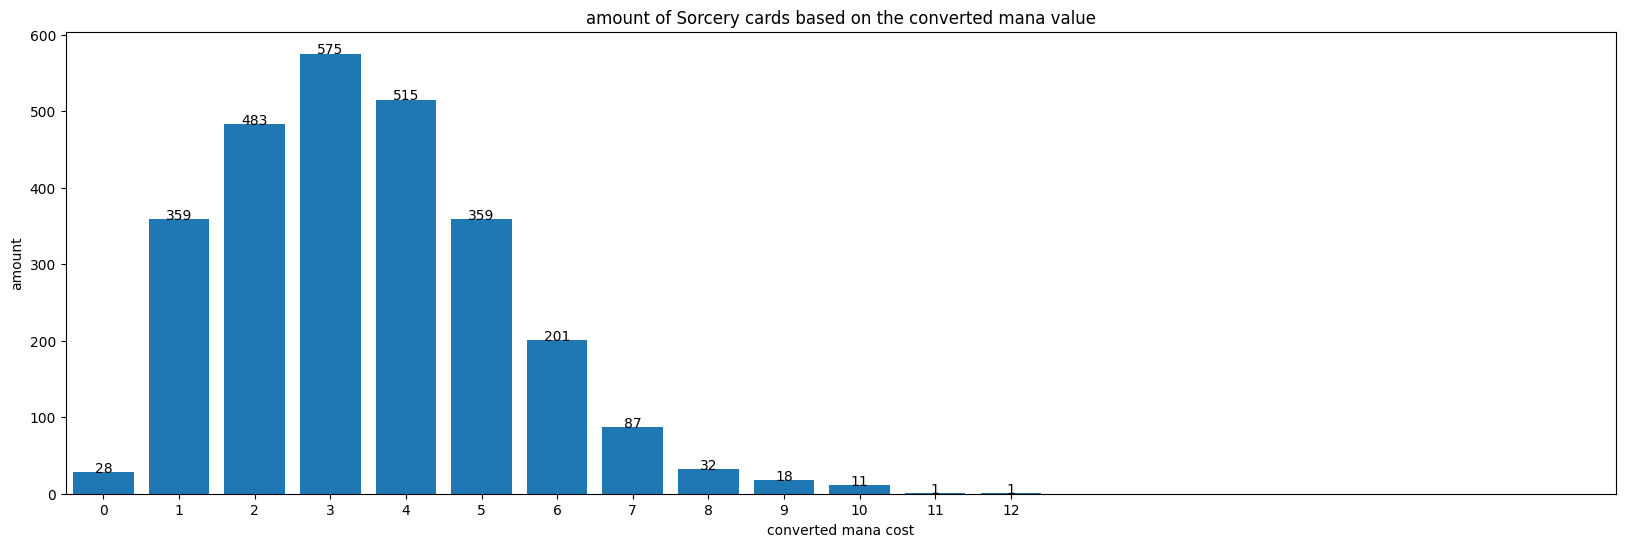

Error


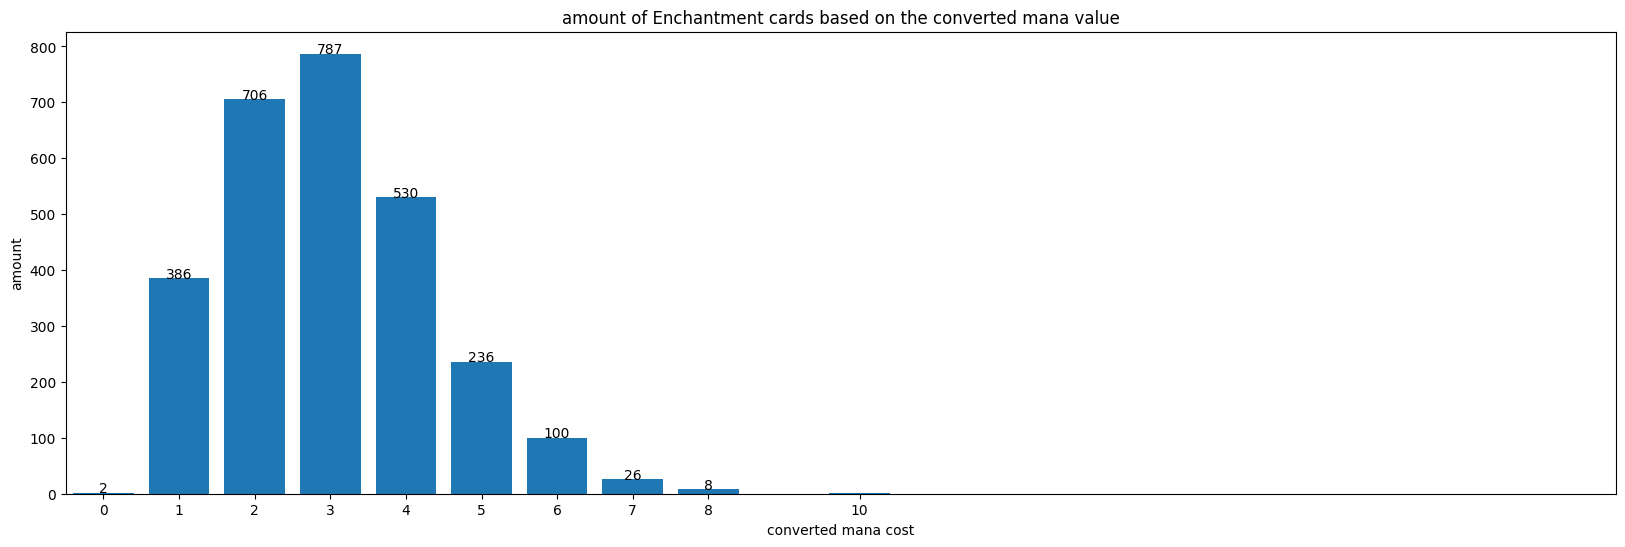

Error


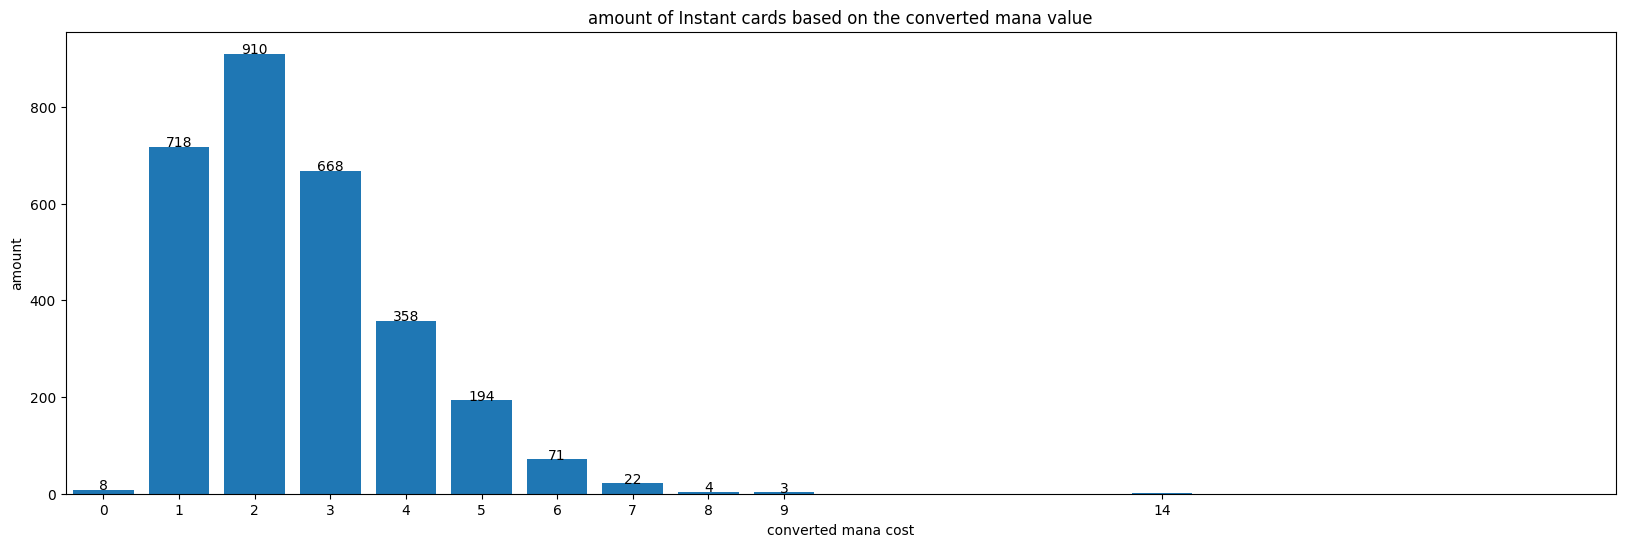

Error


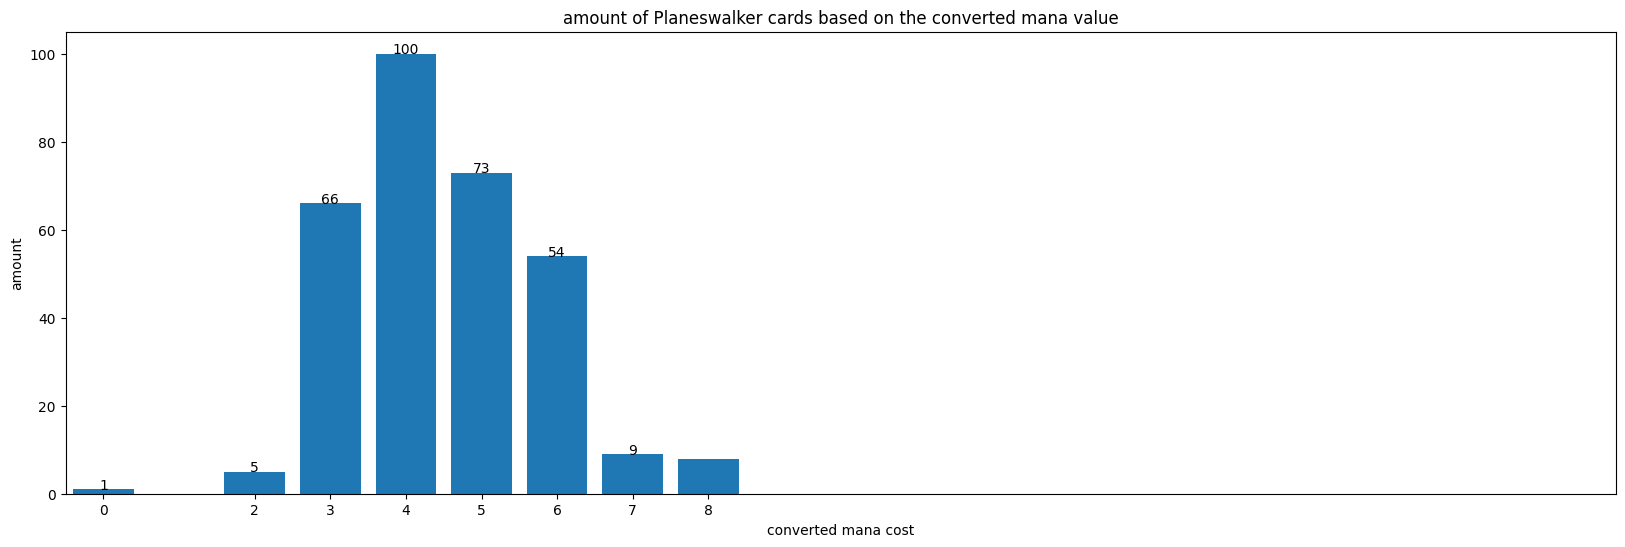

Error


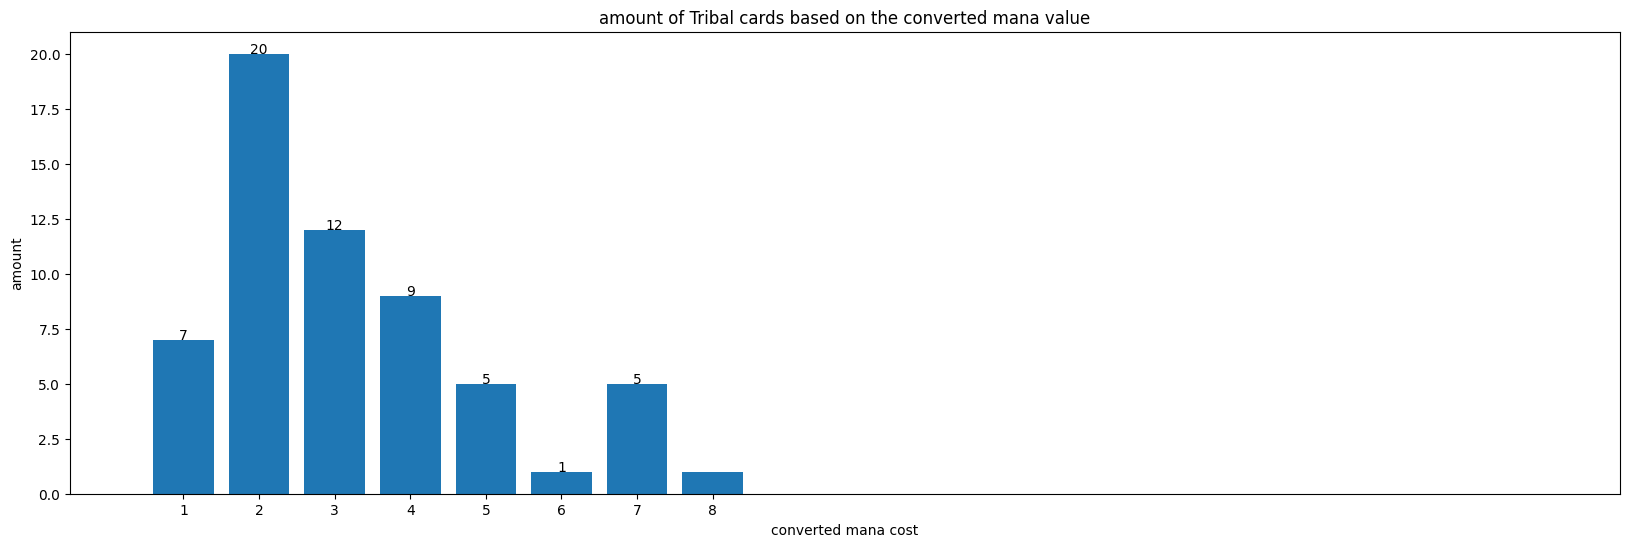

Error


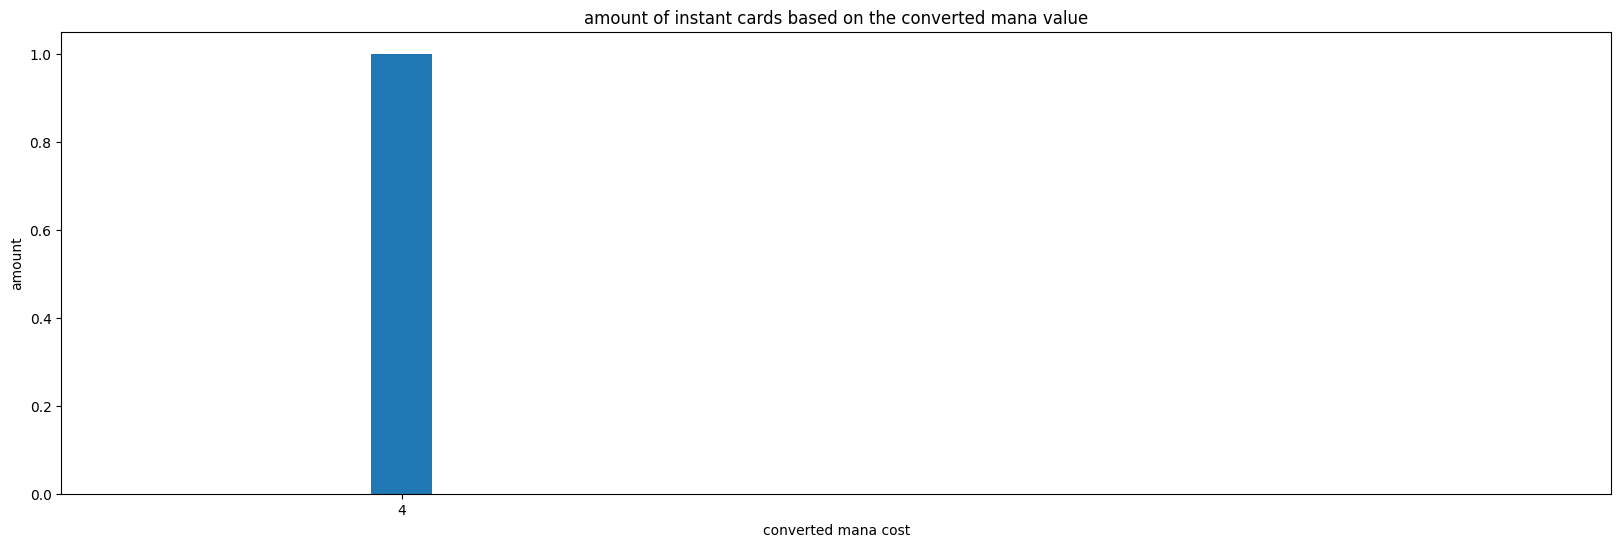

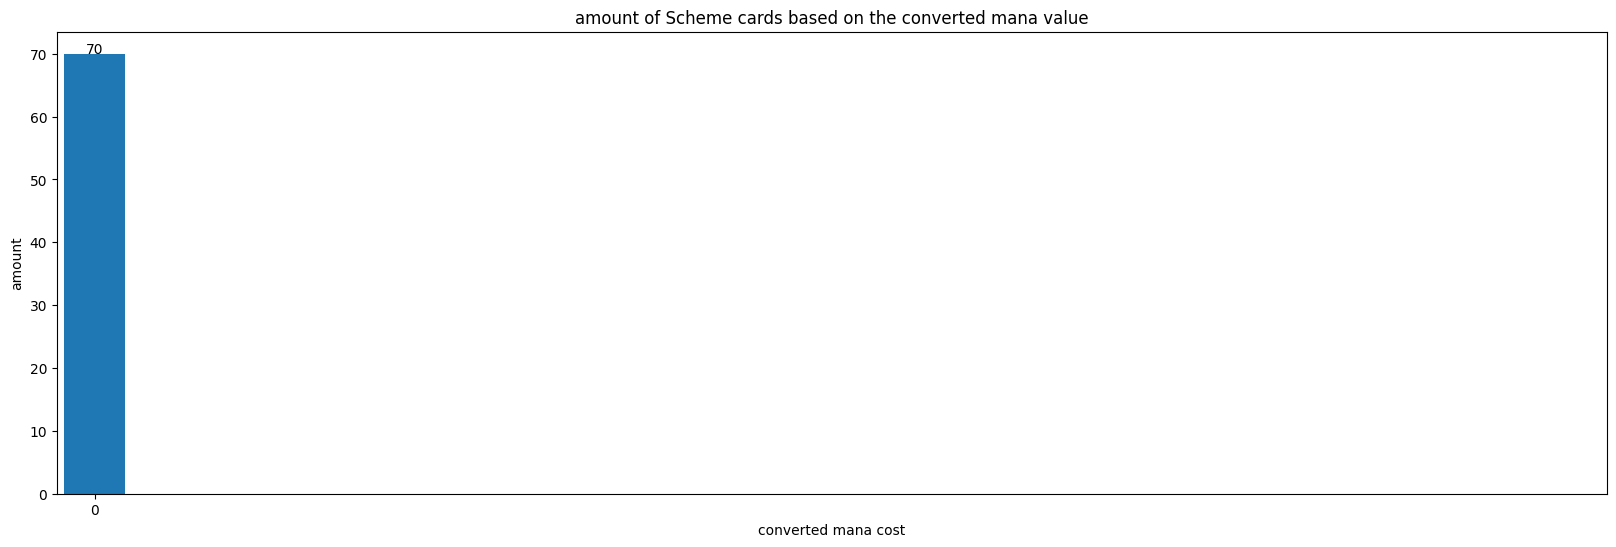

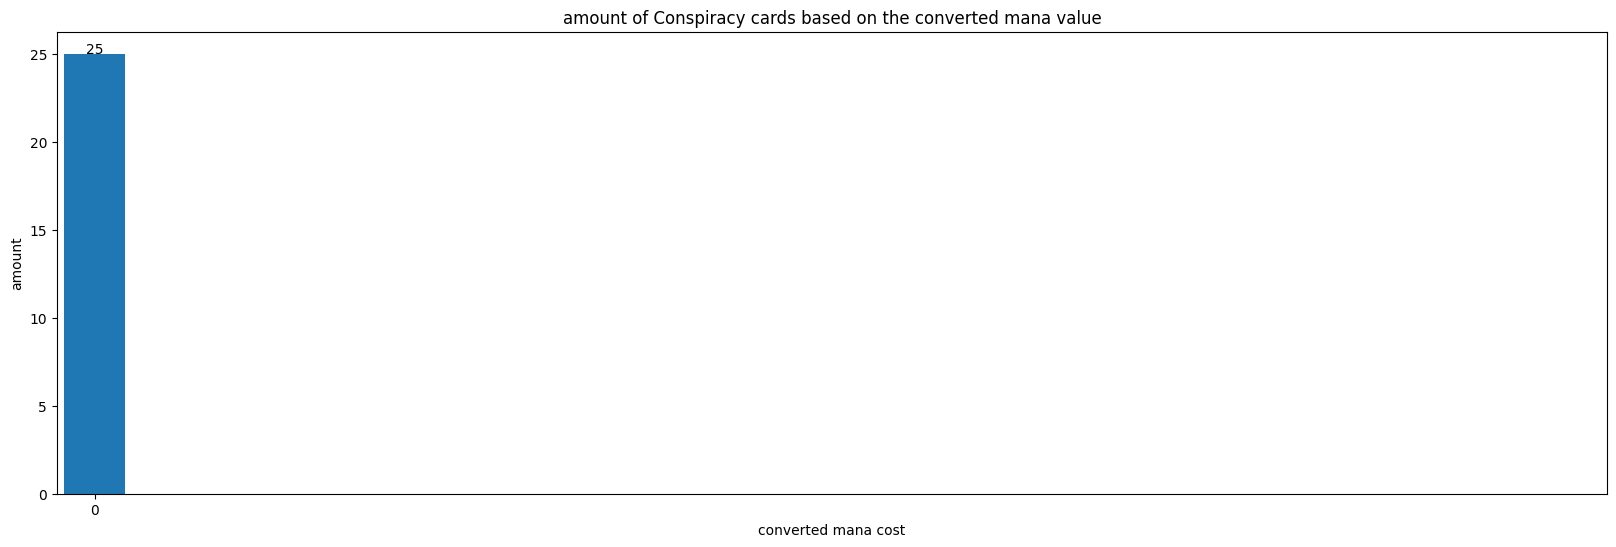

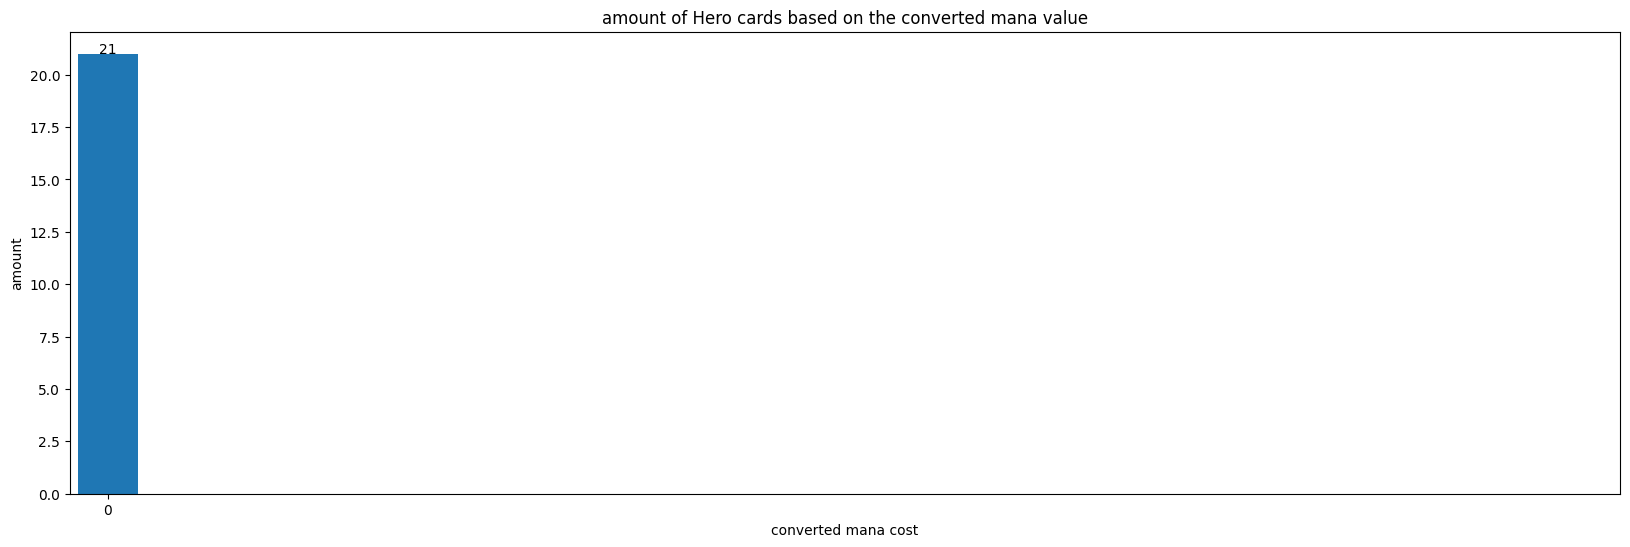

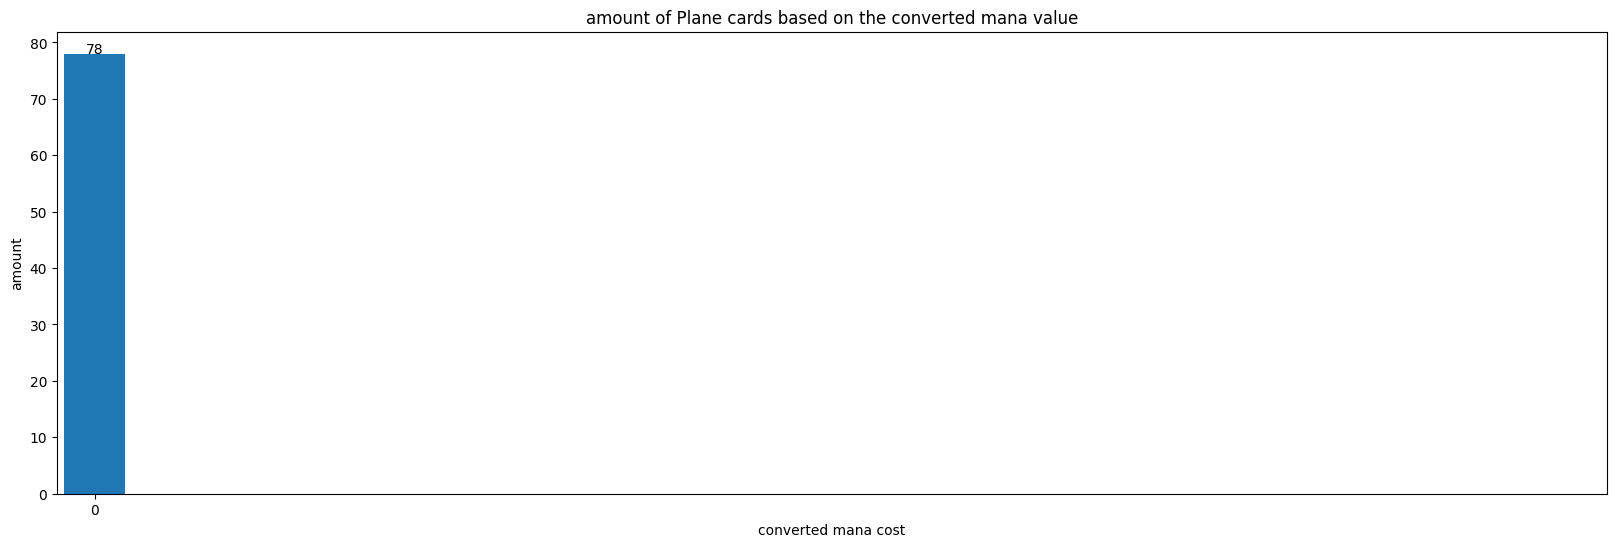

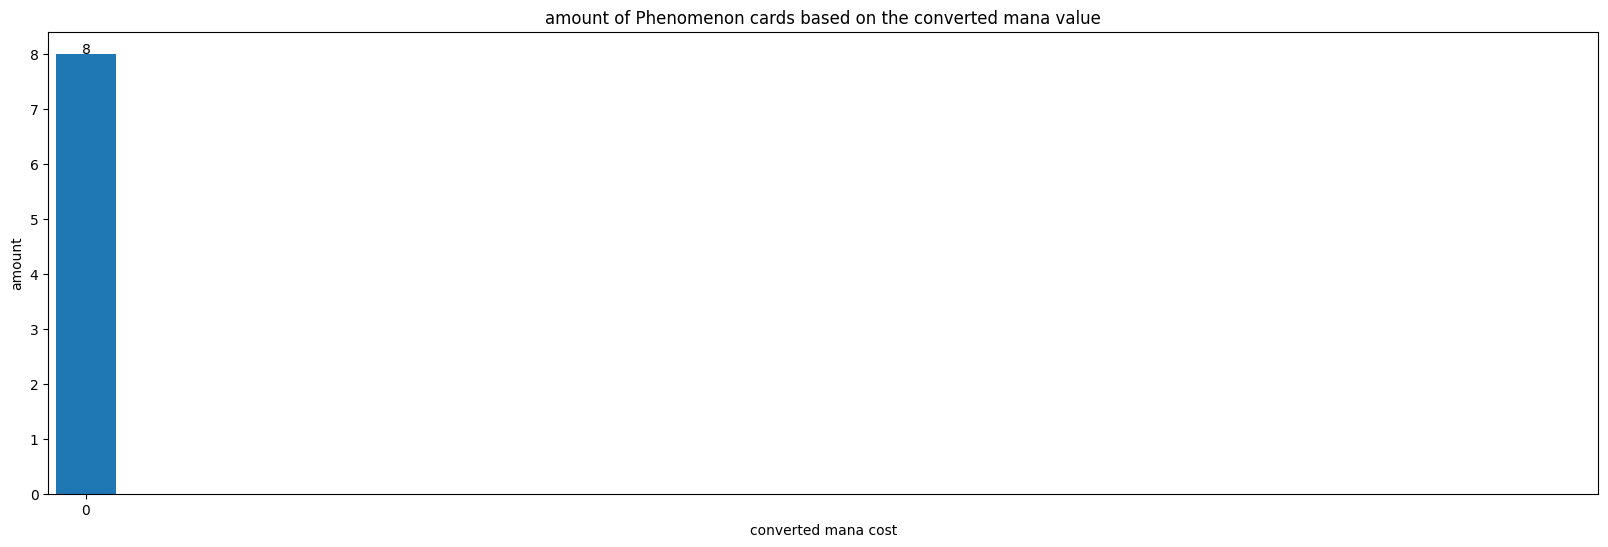

Error
Error


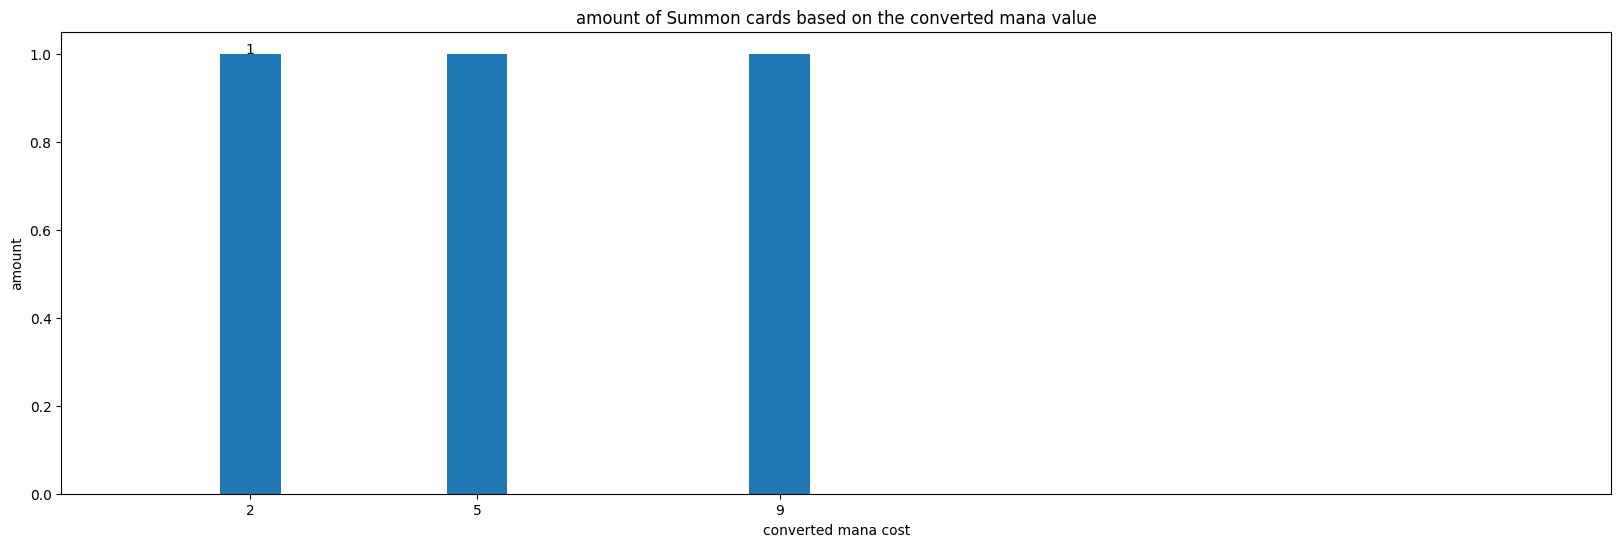

Error


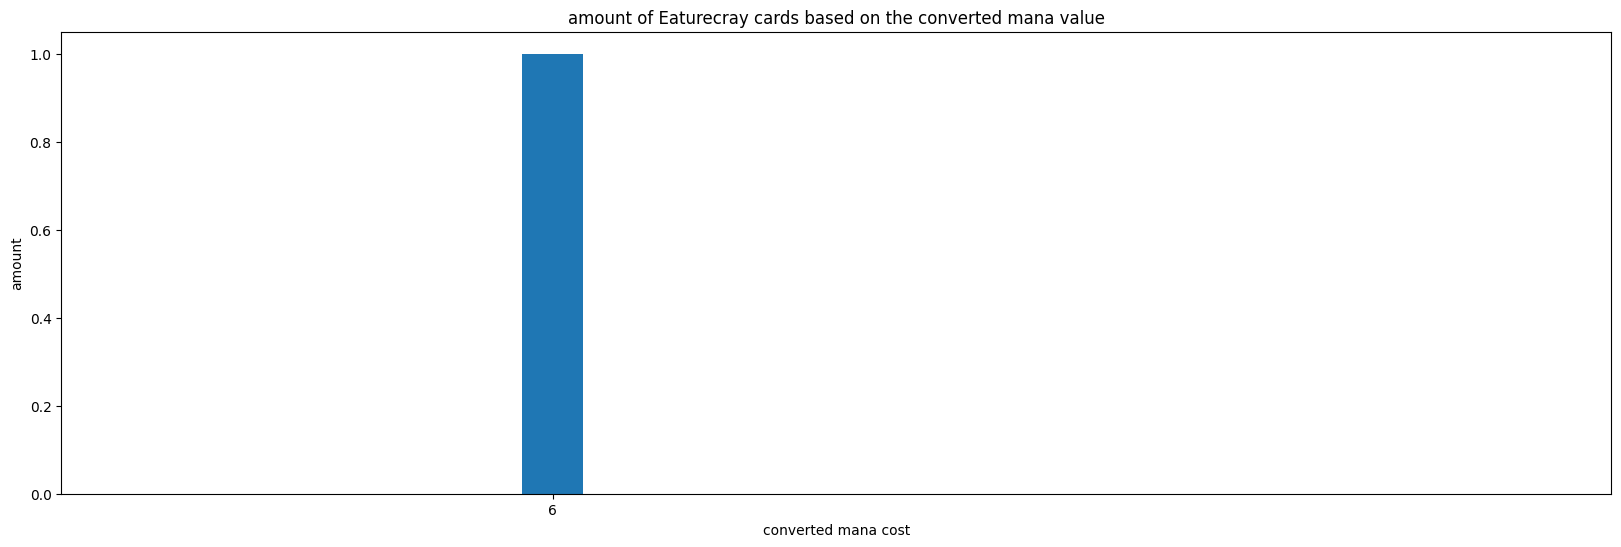

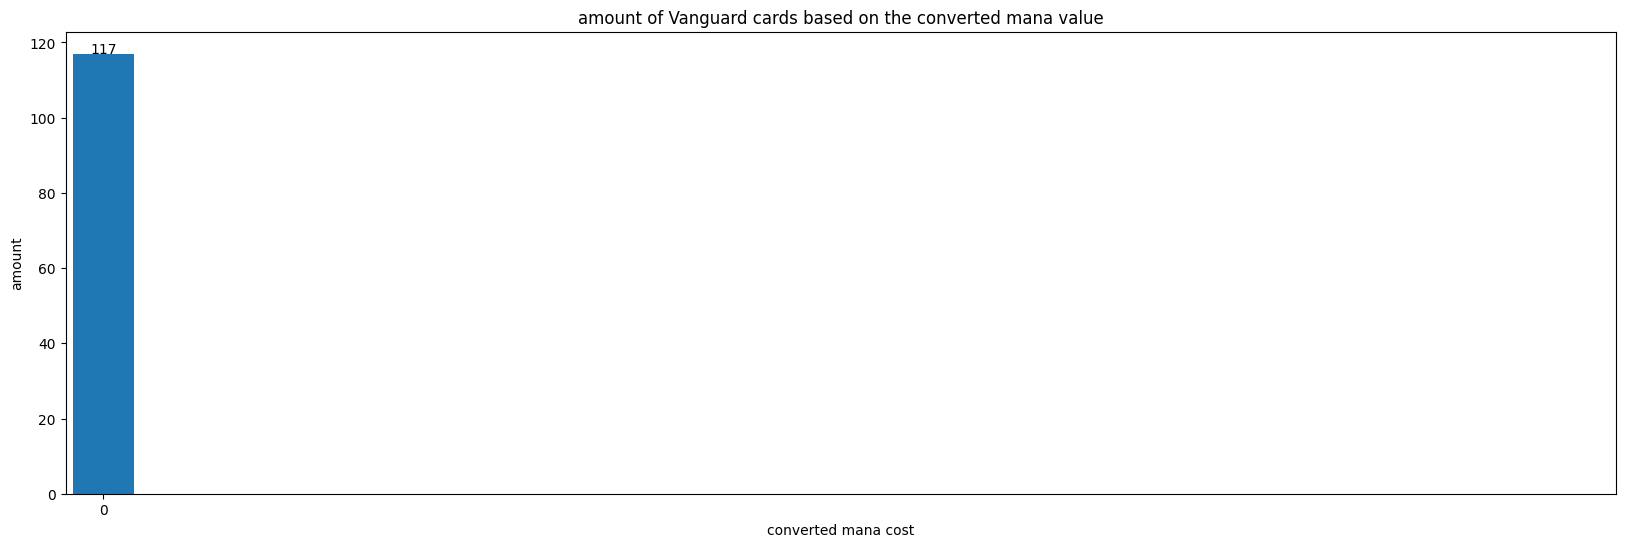

In [18]:
#lista_type = create_lista_all_type()
#print(lista_type)
#prova = search_row_by_type('Creature')
#len(prova) #ottimo sono tutte lecreture, basta sommarle con quelle sopra, adesso faccio una fuznio completa per tutti i tipi
#cmc per creature
lista_type = create_lista_all_type()
for x in lista_type:
    index_type = search_row_by_type(x) #creature
    plt.figure(figsize=(20,6))
    plt.title(f'amount of {x} cards based on the converted mana value')
    plt.ylabel('amount')
    plt.xlabel('converted mana cost')
    aa = final_clean_df.iloc[index_type]
    plt.bar(aa.cmc.value_counts().index,aa.cmc.value_counts())
    plt.xticks(aa.cmc.value_counts().index)
    plt.xlim(-0.5,20)
    #plt.ylim(top= 3000)
    addlabels(aa.cmc.value_counts().index,aa.cmc.value_counts(),3000)
    plt.show()
#final_clean_df.iloc[mask_index_type] #ok tutte le righe creture
    
#NB ok ce un problema con un artefatto a un costo di mana uguale a 100000000, problemi con il grafico

potrei fare la stessa cosa con i subtype e tutti gli altri, però per ora andrei avanti con le altre colonne!!!
RIVEDERE!!

# power and toughness

10 cards with higher power, escludendo i *

NB: power è una stringa o intero

In [19]:
top_power=final_clean_df.sort_values(by='power',ascending=False)[0:20]
top_power[['name','power','toughness','text']]
#ok sono sbagliati sistemare, non va sopra il 9

,name,power,toughness,text
4368,Infinity Elemental,∞,5,(This creature has INFINITE POWER.)
4329,Shellephant,?,?,{0}: Choose one. You may activate this ability...
10422,Skarrg Goliath,9,9,"Trample\nBloodrush — {5}{G}{G}, Discard Skarrg..."
12616,Demon of Death's Gate,9,9,You may pay 6 life and sacrifice three black c...
12923,Pathrazer of Ulamog,9,9,"Annihilator 3 (Whenever this creature attacks,..."
22432,Thing from the Deep,9,9,"Whenever Thing from the Deep attacks, sacrific..."
10421,Skarrg Goliath,9,9,"Trample\nBloodrush — {5}{G}{G}, Discard Skarrg..."
12922,Pathrazer of Ulamog,9,9,"Annihilator 3 (Whenever this creature attacks,..."
15659,Greater Gargadon,9,7,"Suspend 10—{R}\nSacrifice an artifact, creatur..."
15840,Panglacial Wurm,9,5,"Trample\nWhile you're searching your library, ..."


In [20]:
top_toughness = final_clean_df.sort_values(by='toughness',ascending=False)[0:20]
top_toughness[['name','power','toughness','text']]
 #ok sono sbagliati sistemare, non va sopra il 9

,name,power,toughness,text
4329,Shellephant,?,?,{0}: Choose one. You may activate this ability...
13427,Kalonian Behemoth,9,9,Shroud (This creature can't be the target of s...
18043,Avatar of Hope,4,9,"If you have 3 or less life, this spell costs {..."
10421,Skarrg Goliath,9,9,"Trample\nBloodrush — {5}{G}{G}, Discard Skarrg..."
8684,Meandering Towershell,5,9,Islandwalk (This creature can't be blocked as ...
17293,"Kuro, Pitlord",9,9,"At the beginning of your upkeep, sacrifice Kur..."
8554,Breaching Leviathan,9,9,When Breaching Leviathan enters the battlefiel...
4660,Ancient Brontodon,9,9,no text
14429,Witherscale Wurm,9,9,Whenever Witherscale Wurm blocks or becomes bl...
18044,Avatar of Hope,4,9,"If you have 3 or less life, this spell costs {..."


In [21]:
#media
#final_clean_df.groupby('artist').mean() #PERCHè NON MI VA IL GROUPBY???

In [22]:
final_clean_df.power.value_counts()

power
2      3576
1      2606
3      2070
4      1205
5       746
0       595
6       425
7       162
*       151
8        72
9        29
10       26
12        9
11        7
1+*       6
+1        4
15        4
3.5       3
+3        3
2.5       3
+2        3
-1        3
13        3
1.5       2
2+*       2
∞         1
+4        1
*²        1
+0        1
.5        1
16        1
?         1
Name: count, dtype: int64

In [23]:
final_clean_df.toughness.value_counts()

toughness
2      2997
1      2850
3      2287
4      1565
5       864
6       466
0       189
7       172
*       130
8        80
9        32
10       24
1+*      11
12        9
11        9
13        5
15        4
+4        3
3.5       3
+3        3
+2        3
7-*       2
2+*       2
+1        2
+0        1
-0        1
14        1
*²        1
1.5       1
2.5       1
.5        1
-1        1
16        1
?         1
Name: count, dtype: int64

# colors

In [28]:
asse_x=final_clean_df.colors.value_counts(sort=False).index
asse_y = final_clean_df.colors.value_counts(sort=False)
len(asse_x)

32

C:\Users\elped\AppData\Local\Temp\ipykernel_1736\1830353509.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(x[i]<limite):
C:\Users\elped\AppData\Local\Temp\ipykernel_1736\1830353509.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i], i, x[i], ha = 'center')


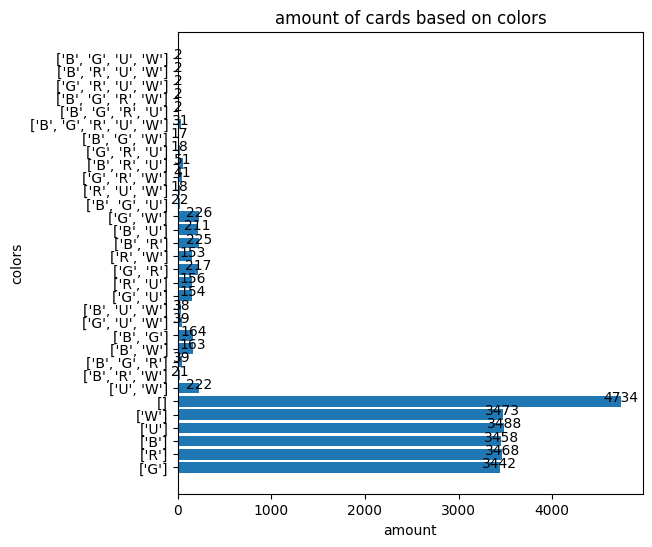

In [38]:
plt.figure(figsize=(6,6))
plt.title(f'amount of cards based on colors')
plt.xlabel('amount')
plt.ylabel('colors')
#aa = final_clean_df.iloc[index_type]
#plt.bar(asse_x,asse_y) #cosi mi da probelmi
#plt.bar(np.arange(0,32),asse_y) #funzia
#plt.bar?
#plt.xticks(np.arange(0,32),asse_x)
plt.barh(np.arange(0,32),asse_y)
plt.yticks(np.arange(0,32),asse_x)
#plt.xlim(-0.5,20)
#plt.ylim(top= 2000)
#addlabels(aa.cmc.value_counts().index,aa.cmc.value_counts(),2000)
addlabels_oriz(asse_x,asse_y,10000)
plt.show()

# color_identity 

In [ ]:
final_clean_df.color_identity.value_counts()

color_identity
[U]                3726
[B]                3698
[R]                3695
[W]                3676
[G]                3647
[]                 2679
[B, R]              324
[U, W]              317
[G, W]              317
[G, R]              309
[B, U]              304
[B, G]              232
[B, W]              223
[R, U]              216
[G, U]              213
[R, W]              213
[B, R, U]            70
[B, G, R, U, W]      67
[G, R, W]            62
[B, G, R]            56
[G, U, W]            54
[B, U, W]            52
[B, G, U]            32
[B, R, W]            31
[G, R, U]            26
[R, U, W]            25
[B, G, W]            25
[B, G, R, U]          2
[B, G, R, W]          2
[G, R, U, W]          2
[B, R, U, W]          2
[B, G, U, W]          2
Name: count, dtype: int64

# legalities

In [55]:
lista_formats = {'standard':0,'future':0,'historic':0,'pioneer':0,'modern':0,'legacy':0,'pauper':0,'vintage':0,'penny':0,'commander':0,'brawl':0,'duel':0,'oldschool':0} #conto solo quelle legali, differenza -> non legali
#print(type(lista_formats))
lista_formats


{'standard': 0,
 'future': 0,
 'historic': 0,
 'pioneer': 0,
 'modern': 0,
 'legacy': 0,
 'pauper': 0,
 'vintage': 0,
 'penny': 0,
 'commander': 0,
 'brawl': 0,
 'duel': 0,
 'oldschool': 0}

In [58]:
final_clean_df.legalities.iloc[30]

{'standard': 'legal',
 'future': 'legal',
 'historic': 'legal',
 'pioneer': 'legal',
 'modern': 'legal',
 'legacy': 'legal',
 'pauper': 'not_legal',
 'vintage': 'legal',
 'penny': 'not_legal',
 'commander': 'legal',
 'brawl': 'legal',
 'duel': 'legal',
 'oldschool': 'not_legal'}

In [ ]:
final_clean_df.legalities.iloc[30]
for forma,dict_legale in final_clean_df.legalities.iloc[30].items():
    if forma in lista_formats:
        if dict_legale == 'legal':
            lista_formats[forma] += 1
lista_formats

In [59]:
#NUMERO CARTE LEGALI PER FORMATO
# dove è legale la carta
# è composta di un dizionario con key e legal, not_legal,
#non ho idea di come rappresentarlo
final_clean_df.legalities.iloc[30]
#allora
#count = 0
lista_formats = {'standard':0,'future':0,'historic':0,'pioneer':0,'modern':0,'legacy':0,'pauper':0,'vintage':0,'penny':0,'commander':0,'brawl':0,'duel':0,'oldschool':0} #conto solo quelle legali, differenza -> non legali
for indice,dict_legale in final_clean_df.legalities.items():
    #count += 1
    #print(count)
    #print(type(legale))
    for forma,legal in dict_legale.items(): #scorro il dizionario
        #print(f)
        if forma in lista_formats:
            if legal == 'legal':
                lista_formats[forma] += 1
lista_formats
            


{'standard': 2653,
 'future': 2654,
 'historic': 3785,
 'pioneer': 8334,
 'modern': 16415,
 'legacy': 23319,
 'pauper': 9625,
 'vintage': 23316,
 'penny': 15166,
 'commander': 23361,
 'brawl': 2650,
 'duel': 23299,
 'oldschool': 1064}

In [81]:
x = list(lista_formats.values())
x[1]

2654

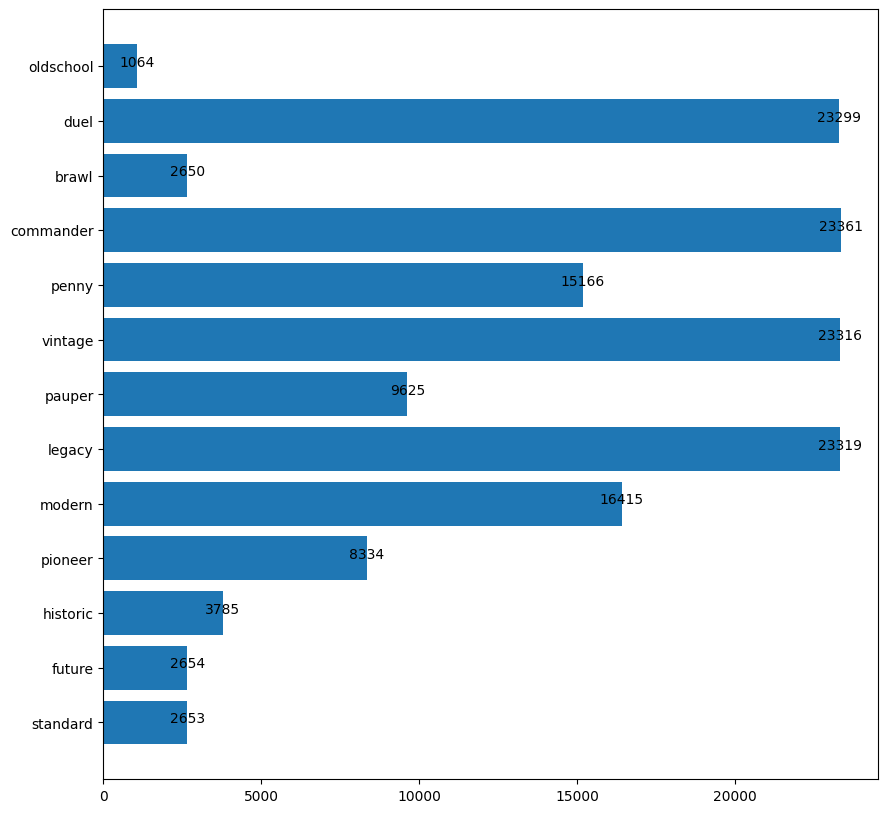

In [86]:
plt.figure(figsize=(10,10))
plt.barh(np.arange(0,13),lista_formats.values())
plt.yticks(np.arange(0,13),lista_formats.keys())
addlabels_oriz(lista_formats.keys(),list(lista_formats.values()),limite= 3000000)
plt.show()

# games

In [87]:
final_clean_df.games.iloc[30]

['arena', 'mtgo', 'paper']

In [88]:
lista_wicp = {'arena':0,'mtgo':0,'paper':0}

for indice, list_games in final_clean_df.games.items():
    for x in list_games:
        lista_wicp[x] += 1

lista_wicp 

{'arena': 2259, 'mtgo': 19458, 'paper': 23971}

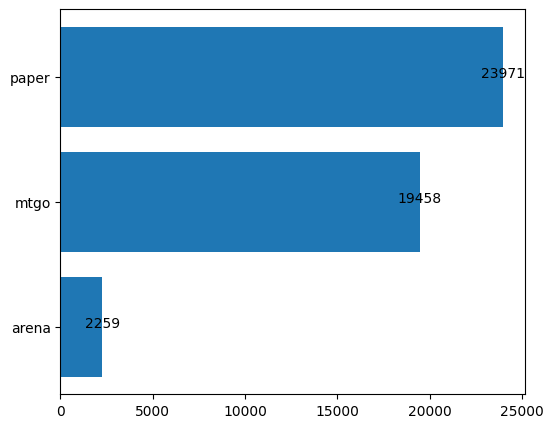

In [91]:
plt.figure(figsize=(6,5))
plt.barh(np.arange(0,3),lista_wicp.values())
plt.yticks(np.arange(0,3),lista_wicp.keys())
addlabels_oriz(lista_wicp.keys(),list(lista_wicp.values()), limite=3000000)
plt.show()

# reserved

In [92]:
final_clean_df.reserved.iloc[30]

False

In [101]:
reserved_true = final_clean_df[final_clean_df.reserved == True].shape[0]
reserved_false = final_clean_df[final_clean_df.reserved == False].shape[0]
lista_reserved_number = [reserved_true, reserved_false]
lista_reserved_number

#molto più semplice
final_clean_df.reserved.value_counts()

reserved
False    23650
True       649
Name: count, dtype: int64

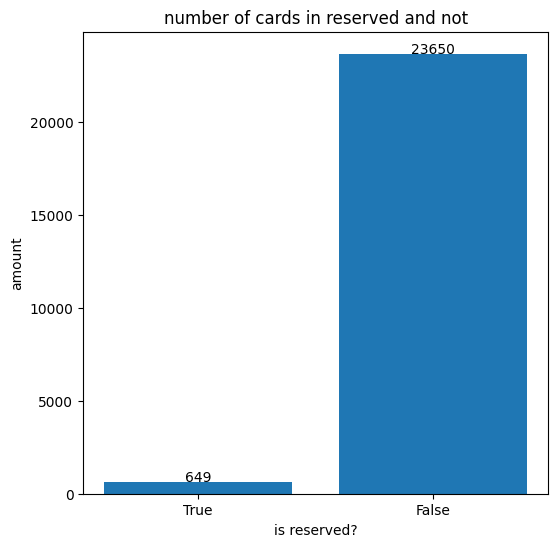

In [98]:
plt.figure(figsize=(6,6))
plt.title('number of cards in reserved and not')
plt.xlabel('is reserved?')
plt.ylabel('amount')
plt.bar(['True','False'],lista_reserved_number)
addlabels(['True','False'],lista_reserved_number,30000)
plt.show()

# reprint

In [99]:
final_clean_df.reprint.iloc[30]

False

In [103]:
final_clean_df.reprint.value_counts().index

Index([False, True], dtype='bool', name='reprint')

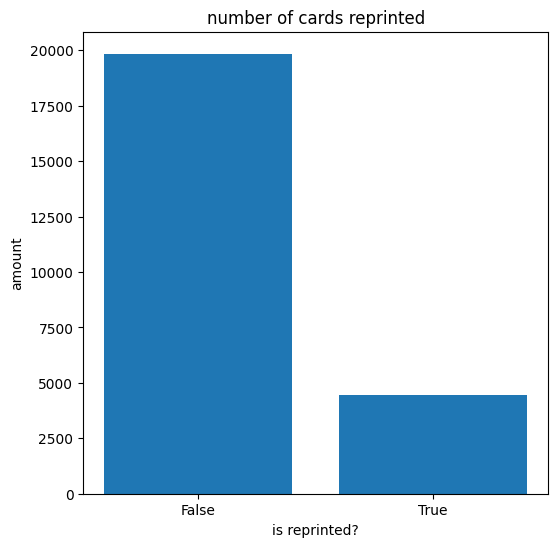

In [106]:
plt.figure(figsize=(6,6))
plt.title('number of cards reprinted')
plt.xlabel('is reprinted?')
plt.ylabel('amount')
plt.bar(np.arange(0,len(final_clean_df.reprint.value_counts().index)),final_clean_df.reprint.value_counts())
plt.xticks(np.arange(0,len(final_clean_df.reprint.value_counts().index)),final_clean_df.reprint.value_counts().index)
plt.show()

In [107]:
#quali set o carte sosno state ristampate più volte 

# rarity

In [108]:
final_clean_df.rarity.iloc[30]

'mythic'

In [109]:
final_clean_df.rarity.value_counts()

rarity
common      9270
rare        7083
uncommon    6730
mythic      1216
Name: count, dtype: int64

C:\Users\elped\AppData\Local\Temp\ipykernel_1736\2824767837.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(y[i]<limite):
C:\Users\elped\AppData\Local\Temp\ipykernel_1736\2824767837.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], y[i], ha = 'center')


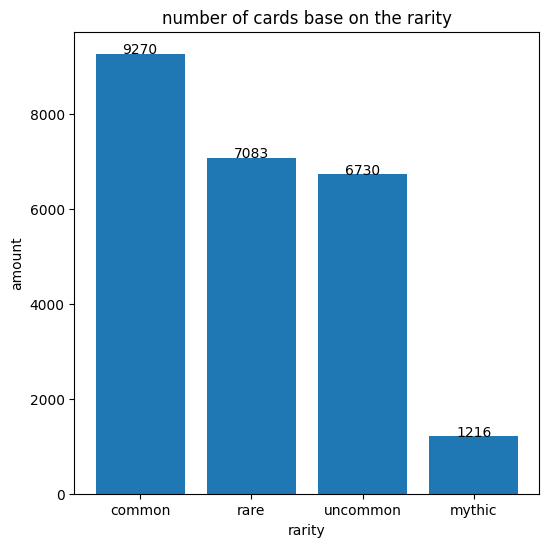

In [111]:
plt.figure(figsize=(6,6))
plt.title('number of cards base on the rarity')
plt.xlabel('rarity')
plt.ylabel('amount')
plt.bar(np.arange(0,len(final_clean_df.rarity.value_counts().index)),final_clean_df.rarity.value_counts())
plt.xticks(np.arange(0,len(final_clean_df.rarity.value_counts().index)),final_clean_df.rarity.value_counts().index)
addlabels(final_clean_df.rarity.value_counts().index, final_clean_df.rarity.value_counts(), limite=1000000)
plt.show()

In [ ]:
# prezzi con le rarità e le rancket

# artist

In [114]:
#artista con più carte (ristampe) i primi 10
final_clean_df.artist.iloc[30]

'Grzegorz Rutkowski'

In [115]:
final_clean_df.artist.value_counts()[0:10]

artist
Kev Walker             422
John Avon              314
Pete Venters           285
Greg Staples           276
Christopher Moeller    262
Ron Spencer            233
Svetlin Velinov        233
Dan Scott              232
Daarken                220
Mark Tedin             219
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(6,6))
plt.bar()
plt.show()

In [ ]:
#a che set hanno lavorato?

# edhrank

In [11]:
rank = final_clean_df.edhrec_rank.iloc[30]
print(type(rank)) #forse ci sono valori che sono float e altri str

#final_clean_df.edhrec_rank[final_clean_df.edhrec_rank == type(str)]
for x in final_clean_df.edhrec_rank:
    if type(x) == str:
        print(x)
        print(f'stringa')

<class 'float'>
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stringa
not ranked
stri

In [60]:
#ok devo tenere in conto che ci sono dei float e sei str
edhrec_only_rank = final_clean_df[final_clean_df.edhrec_rank != 'not ranked']
#ordino
edhrec_only_rank_sort = edhrec_only_rank.sort_values(by='edhrec_rank') #ok sono presenti più ripetizioni di carte per le ristampe
#provo a togliere le ristampe #FARE


#for x,y in edhrec_only_rank_sort[['name','edhrec_rank']][0:40].items():
#    print(x) #x nome colonna
#    print(y) #y valori colonna + indice 

#edhrec_only_rank.name.drop_duplicates?

edhrec_only_rank_sort.drop_duplicates(subset=['name'],inplace=True)
edhrec_only_rank_sort[['name','edhrec_rank']][0:40] #ok le prime 40 carte in rank



,name,edhrec_rank
2604,Sol Ring,1.0
19,Command Tower,2.0
3996,Evolving Wilds,8.0
3187,Reliquary Tower,9.0
6419,Lightning Greaves,10.0
15550,Terramorphic Expanse,11.0
11749,Swiftfoot Boots,12.0
8212,Temple of the False God,13.0
10581,Swords to Plowshares,14.0
10798,Cyclonic Rift,15.0


# subtypes

In [61]:
final_clean_df.subtypes.iloc[30]

['Faerie', 'Warlock']

In [93]:
#crechiamo qunati subtype esistono, è simile alla funzione dei type!!!

#creo la lista con tutti i subtypes
#lista con tipi importanti
def create_lista_subtypes(): #ok perfetto
    lista_subtypes = []
    for index,tipo in final_clean_df.subtypes.items():
        for x in tipo:
            if x not in lista_subtypes:
                lista_subtypes.append(x)
    return lista_subtypes

def count_subtypes(search_subtype): #ok perfetto, lo modifico e ritorno un count, non posso la lista la devo ritrasformare in un dizio
    lista_indici = []
    count = 0
    for index,tipo in final_clean_df.subtypes.items():
        if search_subtype in tipo:
            count += 1
            lista_indici.append(index)
    return count

#lista subtype
lista_subtypes = create_lista_subtypes()
lista_subtypes.sort()
lista_subtypes

#PERCHè HO FAATO TUTTO QUESTO
#final_clean_df.subtypes.value_counts() #ok non mi divide le robe, tiene tutto unito

#rimepio la lista
dizi_subtype = {}
for x in lista_subtypes:
    dizi_subtype[x] = search_row_by_subtypes(x)
dizi_subtype
sas = sorted(dizi_subtype.items(), key=lambda x: x[1], reverse=True)[0:10] #i primi 10 più frequnti subtype
sas[0]

('Human', 2503)

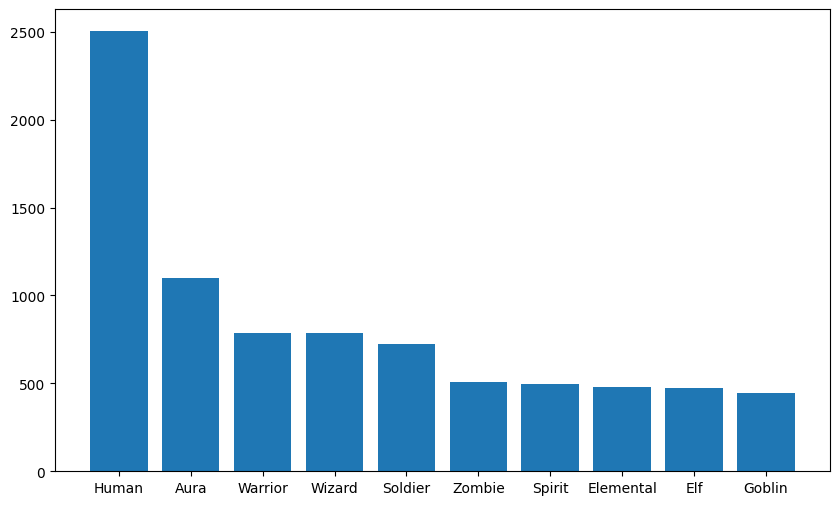

In [98]:
diz = {}
x=0
while x < len(sas):
    diz[sas[x][0]] = sas[x][1]
    x+=1
diz

plt.figure(figsize=(10,6))
plt.bar(diz.keys(),diz.values())
plt.show()

# supertypes

In [99]:
final_clean_df.supertypes.iloc[30]

['Legendary']

In [100]:
final_clean_df.supertypes.value_counts()

supertypes
[]                   21694
[Legendary]           1461
[Basic]               1008
[Snow]                  58
[World]                 29
[Host]                  19
[Basic, Snow]           15
[Ongoing]               12
[Legendary, Snow]        3
Name: count, dtype: int64